In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
#from sklearn import metrics

In [0]:
dataset = pd.read_csv('http://iali.in/datasets/mushrooms.csv')
#dataset.head()

In [0]:
#We applied label encoding because it has only 2 probablity
label_encoder = LabelEncoder()
dataset['class'] = label_encoder.fit_transform(dataset['class'])
#dataset.head()

In [0]:
#Here we have more than 2 possibilities so we have applied one-hot encoding (1 or 0)
encoded_dataset = pd.get_dummies(dataset)
#encoded_dataset.describe

In [0]:
X = encoded_dataset.iloc[:,1:].values
y = encoded_dataset.iloc[:,:1].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [74]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logistic_model.predict(X_test)

In [76]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1020,    0],
       [   3, 1008]])

In [77]:
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score

0.9985228951255539

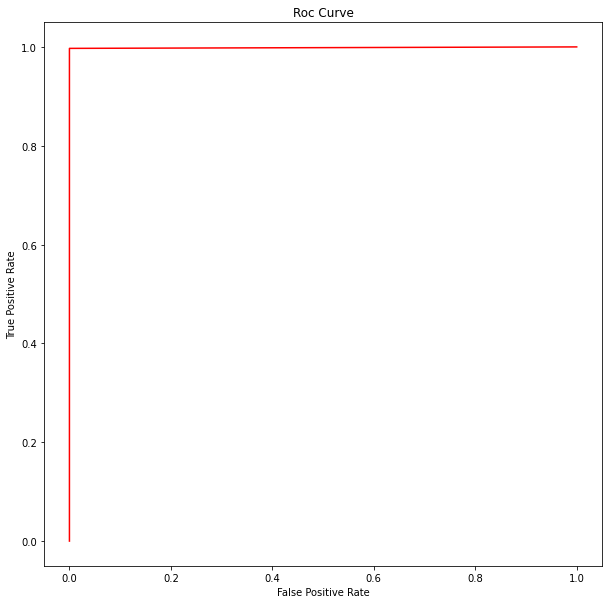

In [79]:
False_pos_rate, True_pos_rate, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10,10))
plt.title('Roc Curve')
plt.plot(False_pos_rate, True_pos_rate, color = 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()